7. Śmierć pacjenta
• Estymacja niewydolności serca
• Aplikacja pokazująca lekarzowi prawdopodobieństwo zdarzenia
• https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import imblearn as imb
from collections import Counter

In [125]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [127]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [128]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [129]:
df.shape

(299, 13)

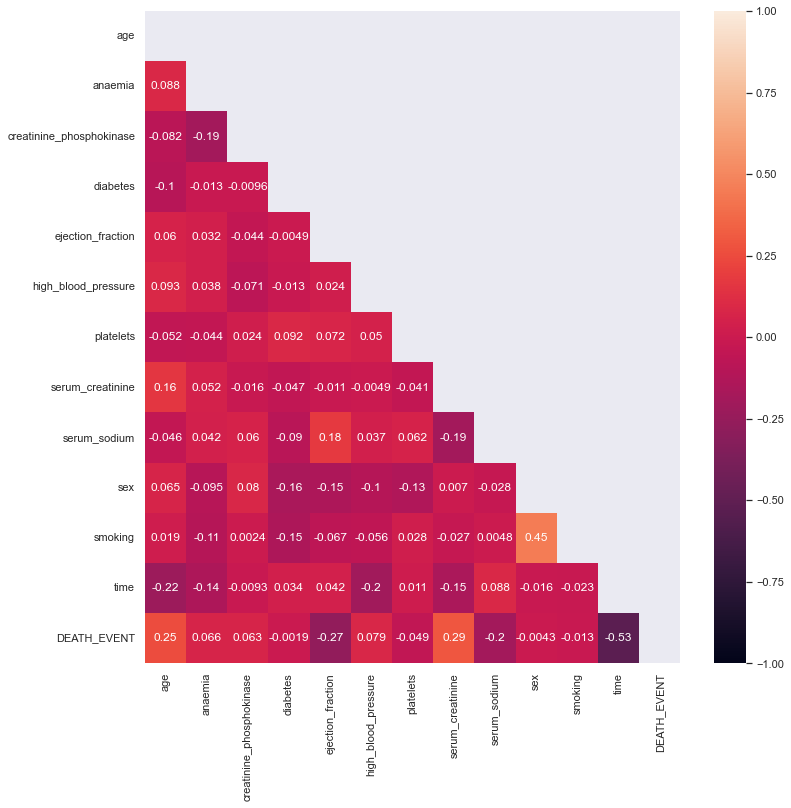

In [130]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr()), k=0) # maska - ukrycie górnej macierzy trójkątnej
sns.heatmap(df.corr(), annot=True, mask = mask, vmin=-1., vmax=1.)#, square=True) # wykonanie wykresu
pass

In [131]:
df.corr()["DEATH_EVENT"].sort_values(ascending=False)[1:]

serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

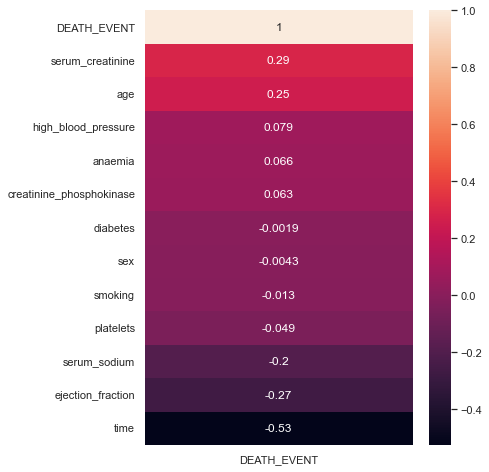

In [162]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True)
plt.show()

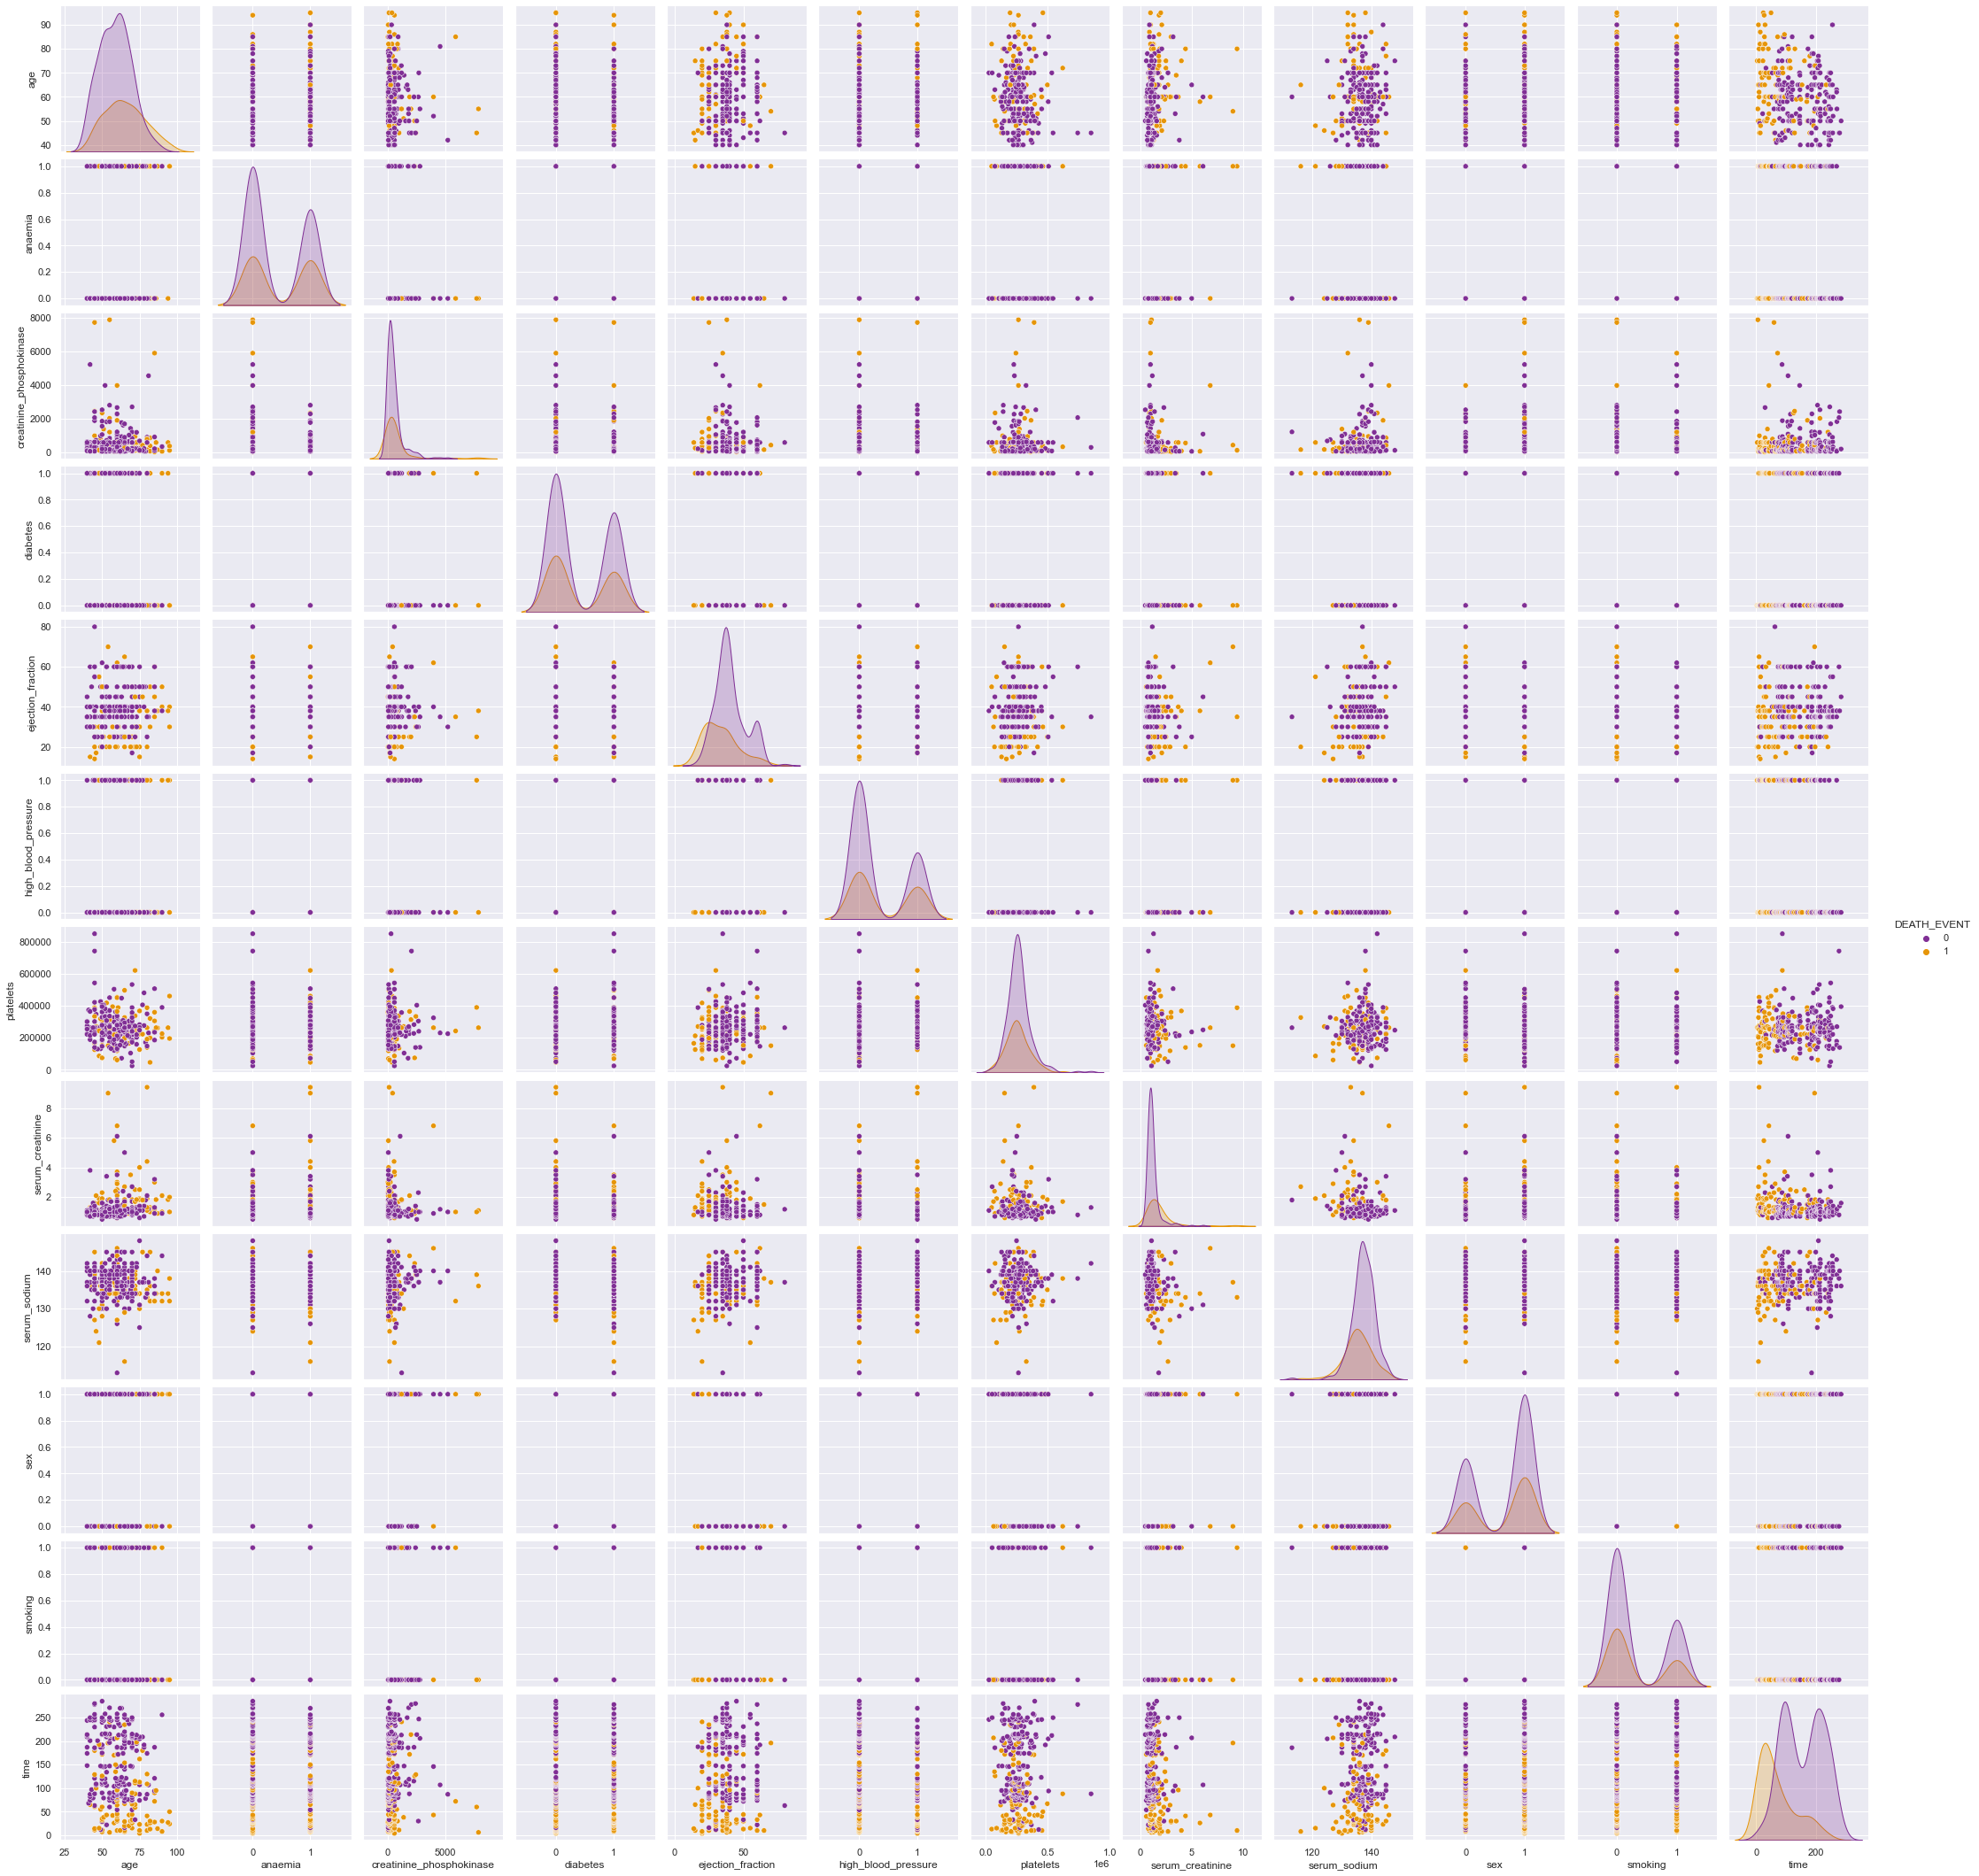

In [163]:
sns.pairplot(df, hue="DEATH_EVENT", palette="CMRmap")
plt.show()

In [132]:
X = df.drop(columns="DEATH_EVENT")
y = df["DEATH_EVENT"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [134]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [135]:
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("Classification matrix: ", classification_report(y_test, y_pred))

Confusion matrix:  [[51  9]
 [ 9 21]]
Classification matrix:                precision    recall  f1-score   support

           0       0.85      0.85      0.85        60
           1       0.70      0.70      0.70        30

    accuracy                           0.80        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.80      0.80      0.80        90



In [136]:
params_grid = {"max_depth": [3,5,7,10, None],
              "max_features": list(range(1,14)),
              "min_samples_leaf": [1, 3, 5]
}

In [137]:
grid_search = GridSearchCV(dtc, param_grid=params_grid, cv=5, verbose=0)
grid_search.fit(X_train, y_train)

C:\Users\hubert.stadnicki\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 975.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hubert.stadnicki\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hubert.stadnicki\AppData\Roaming\Python\Python310\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\hubert.stadnicki\AppData\Roaming\Python\Python310\site-packages\sklearn\tree\_classes.py",

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13],
                         'min_samples_leaf': [1, 3, 5]})

In [138]:
grid_search.best_params_

{'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 5}

In [139]:
y_predCV = grid_search.predict(X_test)

In [156]:
print("Confusion matrix: ","\n", confusion_matrix(y_test, y_predCV))
print("Classification matrix: ","\n", classification_report(y_test, y_predCV))

Confusion matrix:  
 [[48 12]
 [ 4 26]]
Classification matrix:  
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        60
           1       0.68      0.87      0.76        30

    accuracy                           0.82        90
   macro avg       0.80      0.83      0.81        90
weighted avg       0.84      0.82      0.83        90



In [141]:
undersample = imb.under_sampling.RandomUnderSampler()
X_test2, y_test2 = undersample.fit_resample(X,y)

In [142]:
print(Counter(y_test2))

Counter({0: 96, 1: 96})


In [157]:
y_predUS = grid_search.predict(X_test2)

In [158]:
print("Confusion matrix: ", confusion_matrix(y_test2, y_predUS))
print("Classification matrix: ", classification_report(y_test2, y_predUS))

Confusion matrix:  [[82 14]
 [16 80]]
Classification matrix:                precision    recall  f1-score   support

           0       0.84      0.85      0.85        96
           1       0.85      0.83      0.84        96

    accuracy                           0.84       192
   macro avg       0.84      0.84      0.84       192
weighted avg       0.84      0.84      0.84       192



In [145]:
rdc = RandomForestClassifier().fit(X_train, y_train)

In [146]:
# test bez undersamplingu
y_predRDC = rdc.predict(X_test)

In [159]:
print("Confusion matrix: ","\n", confusion_matrix(y_test, y_predRDC))
print("Classification matrix: ","\n", classification_report(y_test, y_predRDC))

Confusion matrix:  
 [[55  5]
 [ 6 24]]
Classification matrix:  
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        60
           1       0.83      0.80      0.81        30

    accuracy                           0.88        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.88      0.88      0.88        90



In [148]:
param_random = {"max_depth": [3, 5, 7, None],
                "n_estimators": [10, 50, 100],
                "max_features": list(range(1, 14)),
                "min_samples_leaf": [1,3,5] 
}

In [149]:
random_search = RandomizedSearchCV(rdc,
                                   param_distributions=param_random,
                                   cv=5,
                                   n_iter=10,
                                   verbose=1, 
                                   scoring='f1_macro',
                                   #scoring=make_scorer(f1_score , average='macro'),
                                   random_state=99)

In [150]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 5, 7, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13],
                                        'min_samples_leaf': [1, 3, 5],
                                        'n_estimators': [10, 50, 100]},
                   random_state=99, scoring='f1_macro', verbose=1)

In [151]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 3,
 'max_features': 11,
 'max_depth': 7}

In [152]:
y_predRDC_random = random_search.predict(X_test)

In [160]:
print("Confusion matrix: ","\n", confusion_matrix(y_test, y_predRDC_random))
print("Classification matrix: ","\n", classification_report(y_test, y_predRDC_random))

Confusion matrix:  
 [[53  7]
 [ 8 22]]
Classification matrix:  
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        60
           1       0.76      0.73      0.75        30

    accuracy                           0.83        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.83      0.83      0.83        90



In [154]:
# ten sam model z undersamplingiem
y_predRDC_random_2 = random_search.predict(X_test2)

In [161]:
print("Confusion matrix: ","\n", confusion_matrix(y_test2, y_predRDC_random_2))
print("Classification matrix: ","\n", classification_report(y_test2, y_predRDC_random_2))

Confusion matrix:  
 [[93  3]
 [17 79]]
Classification matrix:  
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        96
           1       0.96      0.82      0.89        96

    accuracy                           0.90       192
   macro avg       0.90      0.90      0.90       192
weighted avg       0.90      0.90      0.90       192



In [164]:
# standard scaler dla odpowiednich kolumn (wszędzie to mają na kagglu)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# część druga

In [167]:
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [165]:
df_2 = pd.read_csv("heart_failure_clinical_records_dataset.csv")

[0.09333957 0.01447748 0.08302141 0.01059038 0.11015216 0.01439653
 0.07851872 0.14446026 0.06148063 0.01525798 0.01416365 0.36014124]


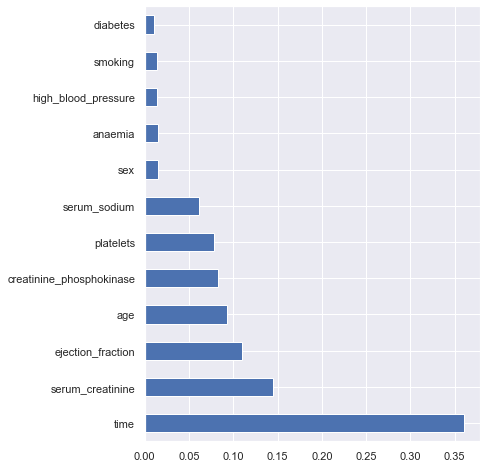

In [171]:
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [178]:
X_2 = df.iloc[:,[0,4,7,11]]
y_2 = df["DEATH_EVENT"]

In [180]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

sc=StandardScaler()
X_train_2 = sc.fit_transform(X_train_2)
X_test_2 = sc.fit_transform(X_test_2)

In [181]:
param_grid2 = {
    "n_estimators": [100, 500, 1000],
    "max_features": [0.5,1,'auto'],
    "max_depth": [1,2,3,4,None],
    "min_samples_split": [2,5,8]
}

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid2, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train_2, y_train_2)
grid.best_params_

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


{'max_depth': 3,
 'max_features': 0.5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [187]:
clf = RandomForestClassifier(
    n_estimators=1000,
    max_features=1,
    max_depth=3,
    min_samples_split=5,
    random_state=0)

In [188]:
clf.fit(X_train_2, y_train_2)
y_pred_2 = clf.predict(X_test_2)

In [189]:
print("Confusion matrix: ","\n", confusion_matrix(y_test_2, y_pred_2))
print("Classification matrix: ","\n", classification_report(y_test_2, y_pred_2))

Confusion matrix:  
 [[59  3]
 [10 18]]
Classification matrix:  
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        62
           1       0.86      0.64      0.73        28

    accuracy                           0.86        90
   macro avg       0.86      0.80      0.82        90
weighted avg       0.86      0.86      0.85        90



Poniżej świetny opis tego co zrobiłem
Należy:

Zrobić funkcję, która będzie mierzyć wszystkie te rzeczt na raz.

In [ ]:
# Reporting
# I evaluated the results I found with Confusion Matrix, the results are as follows:

# Correctly predicted -> %95.00 (282 of 297 predict are correct)

# True Negative -> %68.33 (41 people) -> Those who were predicted not to die and who did not die
# True Positive -> %26.67 (16 people) -> Those who were predicted to die and who did die
# Wrong predicted-> %10.98 (15 of 297 predict are wrong)

# False Positive -> %3.33 (2 people) -> Those who were predicted to die but who did not die
# False Negative -> %01.67 (1 people) -> Those who were predicted to not die but who did die